In [1]:
# Load CSV
import pandas as pd
import numpy as np

filename = 'total_cases.csv'

# Loading with Pandas
data = pd.read_csv(filename)

# Transforming 'object' data to 'categorical' to get numerical (ordinal numbers) representation
data['date'] = data['date'].astype('category')
data['Day'] = data['date'].cat.codes

print(data.shape)
data
#pd.options.display.max_rows=100


(81, 170)


,date,World,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Zambia,Day
0,2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0,...,0.0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,0
1,2020-01-01,27,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0,...,0.0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,1
2,2020-01-02,27,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0,...,0.0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,2
3,2020-01-03,44,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0,...,0.0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,3
4,2020-01-04,44,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0,...,0.0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2020-03-16,167414,16.0,42.0,48.0,5.0,NaN,56.0,30.0,298,...,86.0,1391,3774,8.0,6.0,1.0,15.0,57.0,NaN,76
77,2020-03-17,180159,21.0,51.0,60.0,14.0,NaN,65.0,52.0,375,...,98.0,1543,4661,29.0,8.0,1.0,33.0,61.0,NaN,77
78,2020-03-18,194909,22.0,55.0,60.0,14.0,NaN,79.0,78.0,454,...,113.0,1950,6427,50.0,16.0,1.0,33.0,61.0,NaN,78
79,2020-03-19,213254,22.0,59.0,73.0,53.0,NaN,97.0,115.0,565,...,113.0,2630,9415,79.0,23.0,1.0,33.0,76.0,2.0,79


In [2]:
X_single = data['Day'].values   #Feature matrix
y = data['World'].values #Target variable

In [8]:
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# create matrix versions of these arrays
test_record_number = 5
X_train = X_single[:X_single.shape[0]-test_record_number, np.newaxis]
y_train = y[:X_single.shape[0]-test_record_number]
X_test =  X_single[X_single.shape[0]-test_record_number:, np.newaxis]
y_test = y[X_single.shape[0]-test_record_number:]
X_test

array([[76],
       [77],
       [78],
       [79],
       [80]], dtype=int8)

     x        y
0   81   247281
1   82   270984
2   83   297445
3   84   326891
4   85   359561
5   86   395705
6   87   435584
7   88   479471
8   89   527651
9   90   580421
10  91   638089
11  92   700978
12  93   769423
13  94   843771
14  95   924383
15  96  1011635
16  97  1105915
17  98  1207625
18  99  1317182


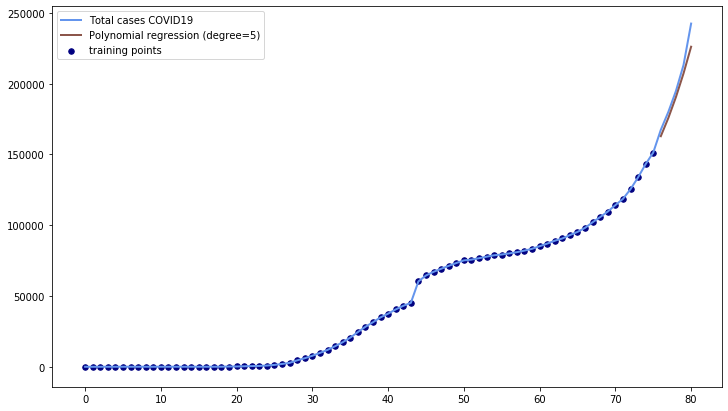

In [12]:
# set up a plot
lw = 2
plt.rcParams["figure.figsize"] = (12, 7)
plt.plot(X_single, y, color='cornflowerblue', linewidth=lw, label="Total cases COVID19")
plt.scatter(X_train, y_train, color='navy', s=30, marker='o', label="training points")

# Polynomial regression with different degree
for degree in range(5, 6):
    #Create a pipeline for a polynomial regression model
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                      ('linear', LinearRegression(fit_intercept=False))
    ])
    model = model.fit(X_train, y_train)
    y_poly_forecast = model.predict(X_test).astype(int)
    color = 'C' + str(degree) 
    plt.plot(X_test, y_poly_forecast, color=color, linewidth=lw,
             label="Polynomial regression (degree=%d)" % degree)

    X_test2 = np.arange(81,100).reshape(-1,1)
    y_poly_forecast2 = model.predict(X_test2).astype(int)
    df1 = pd.DataFrame({'x':X_test2[:,0], 'y':y_poly_forecast2})
    print (df1)

# Logistic regression
lr_model = LogisticRegression(solver='liblinear', tol=1e-6, max_iter=int(1e6))
lr_model.fit(X_train, y_train)    
y_lr_forecast = lr_model.predict(X_test).astype(int)
#plt.plot(X_test, y_lr_forecast, color='gold', linewidth=lw+1, label="Logistic regression")

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_rf_forecast = rf_model.predict(X_test).astype(int)
#plt.plot(X_test, y_rf_forecast, color='darkgreen', linewidth=lw+1, label="Random Forest")


plt.legend(loc='best')
plt.show()